# End to End Machine Learning with Deployment

### Part1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [5]:
!pip install xgboost --quiet

In [6]:
!pip install streamlit --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [7]:
!pip install imbalanced-learn --quiet

In [8]:
!pip install xgboost --quiet

### Step1: Import the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

print("All libraries are imported")

All libraries are imported


### Step2:Load the data and view it

In [2]:
data=pd.read_csv("data.csv")
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [3]:
data.shape


(768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [10]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. The dataset has 768 rows and 10 columns
2. The column 'Unnamed: 0' is redundant
3. There are no nulls 
4. However there are 0's present as null which we have to take care of
5. There are no corrupt characters

### Step3: Clean the data 

In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [13]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [14]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step4: Perform EDA 
1. Univariates- NUmerical
2. UNivariates- Categorical
3. BUvariate - Categorical vs Numerical
4. Bivariate - Numerical vs Numerical 
5. MUltivaraite Pairplot
6. Correlations and Heatmpap
7. Outcome is a binary categorical variable


In [15]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

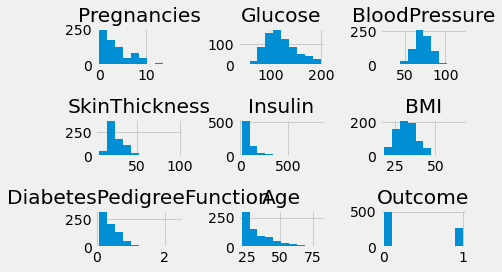

In [16]:
histograms(df)

In [17]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


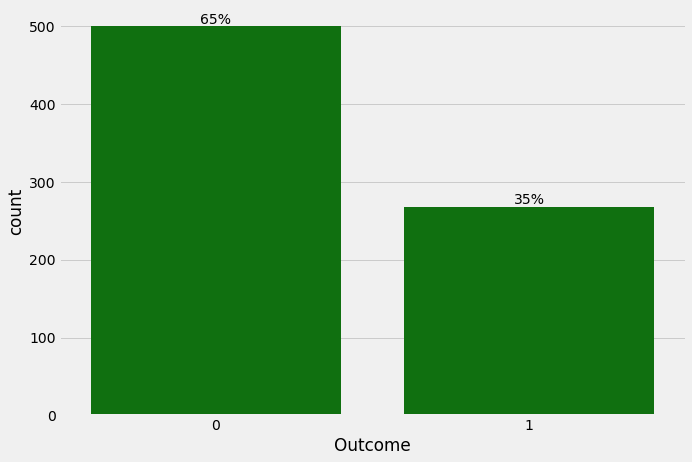

In [18]:
barplot(df, 'Outcome')

In [19]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


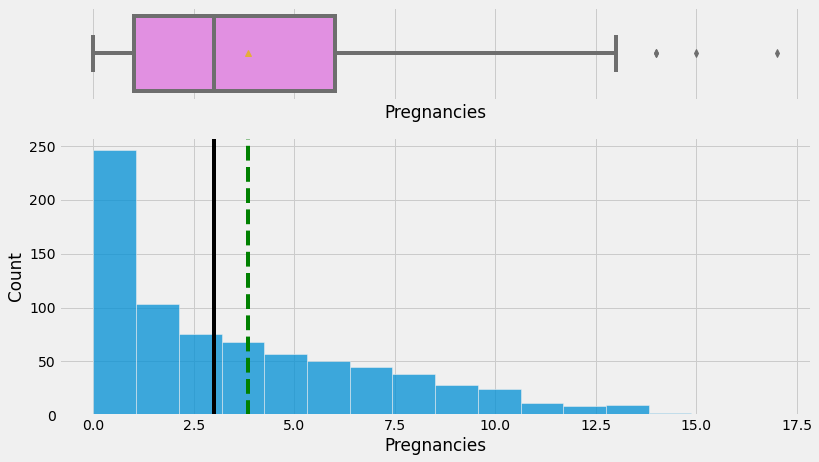

Boxplot and Histplot for  Glucose


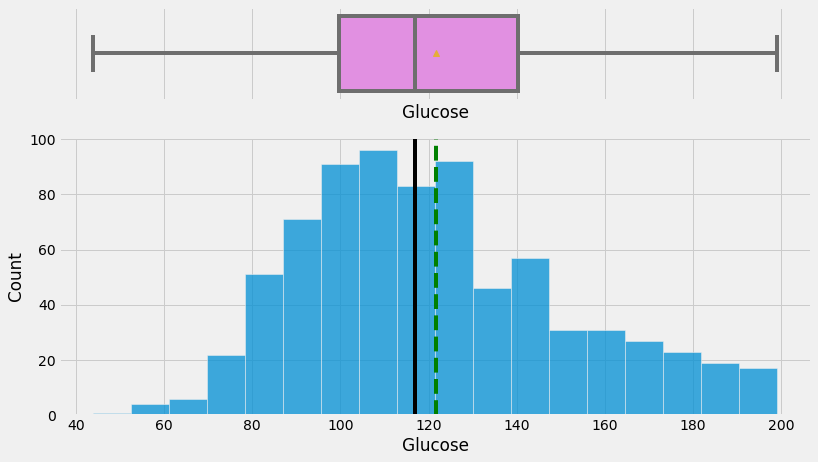

Boxplot and Histplot for  BloodPressure


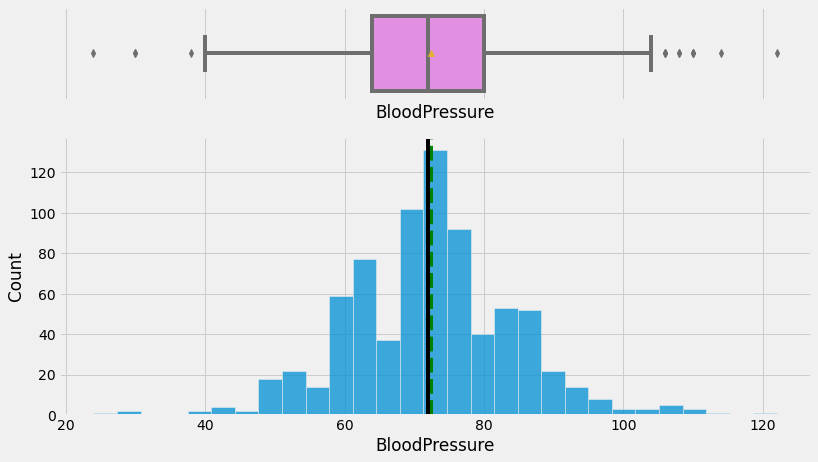

Boxplot and Histplot for  SkinThickness


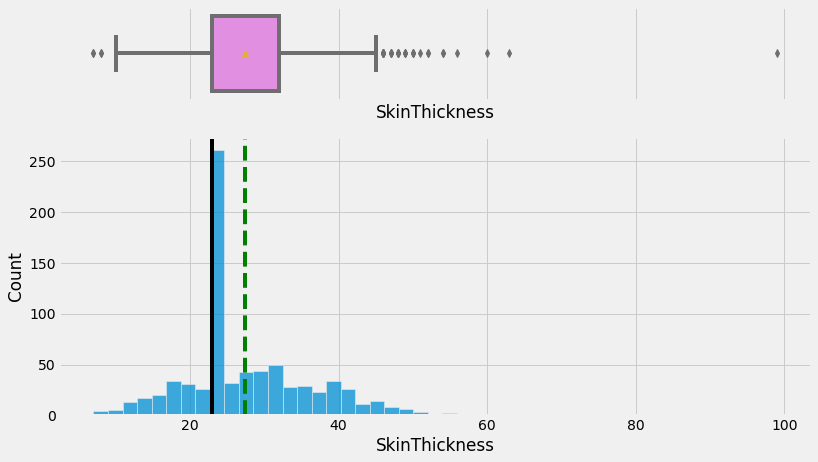

Boxplot and Histplot for  Insulin


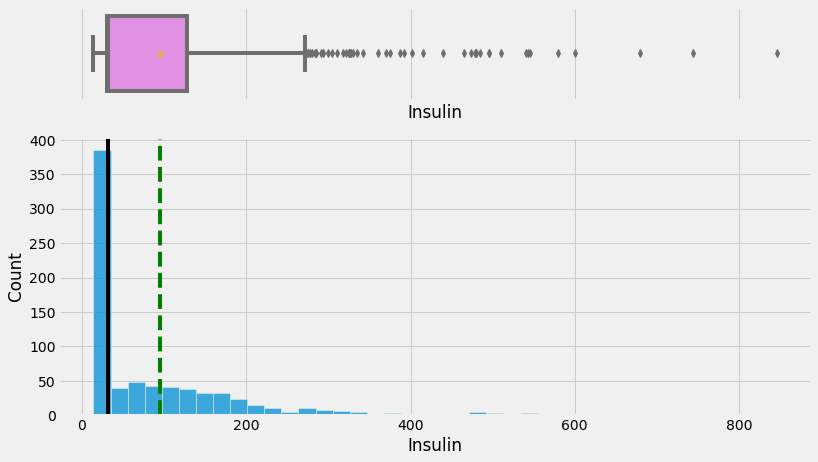

Boxplot and Histplot for  BMI


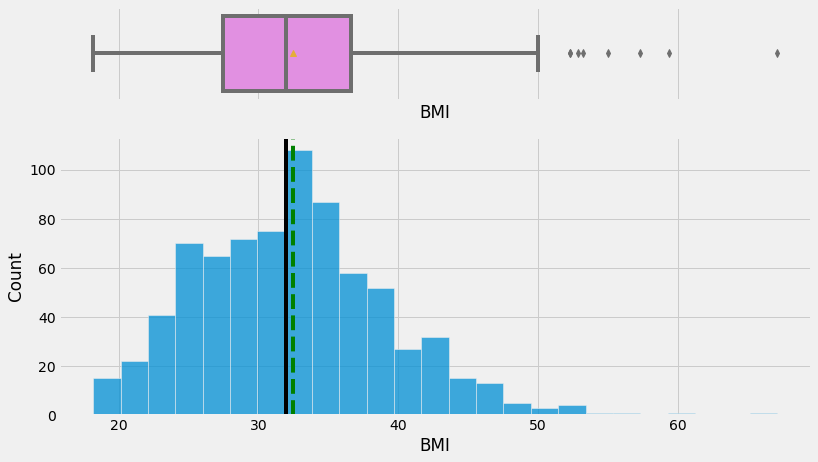

Boxplot and Histplot for  DiabetesPedigreeFunction


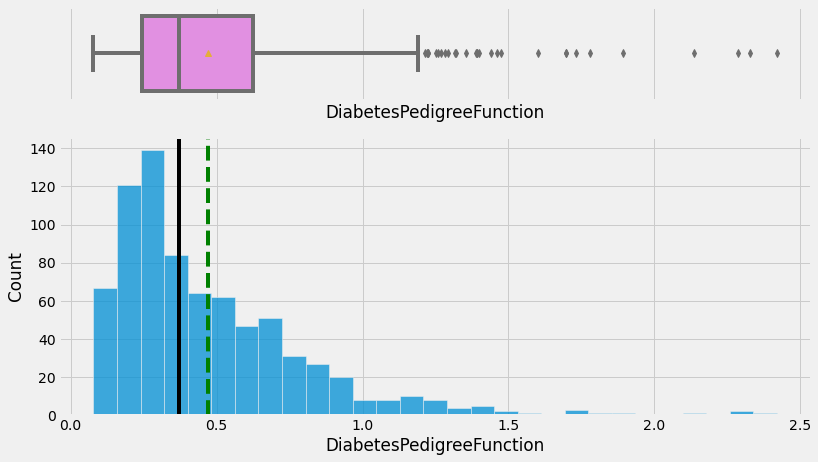

Boxplot and Histplot for  Age


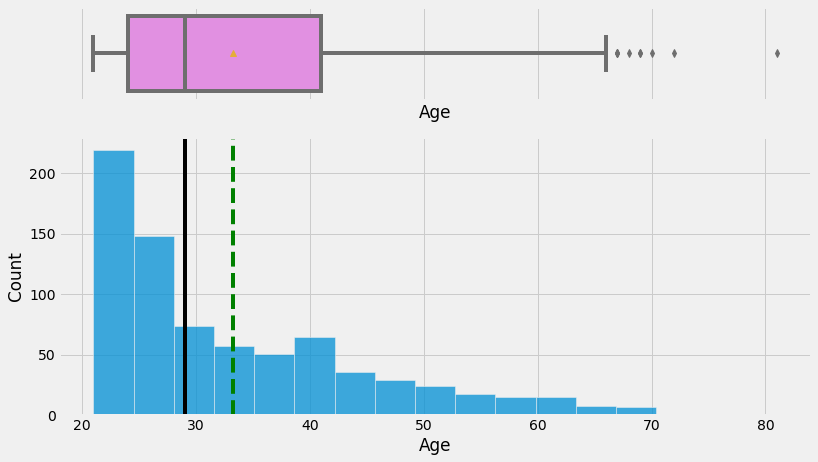

Boxplot and Histplot for  Outcome


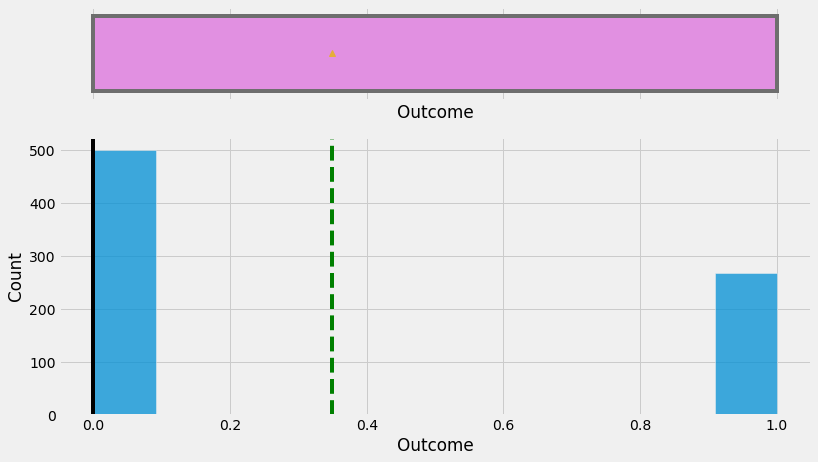

In [20]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [17]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


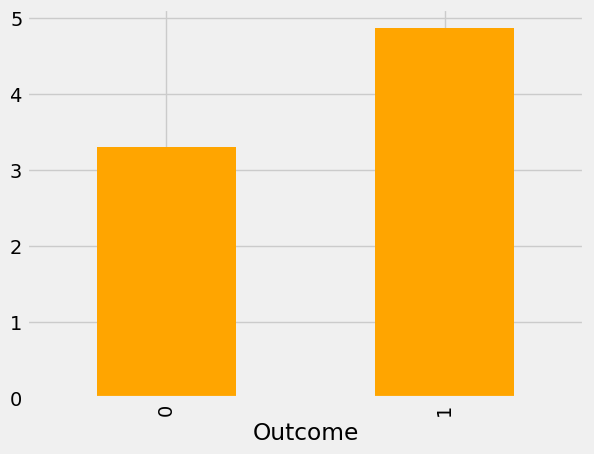

The Bivariate barchart between Outcome and Glucose


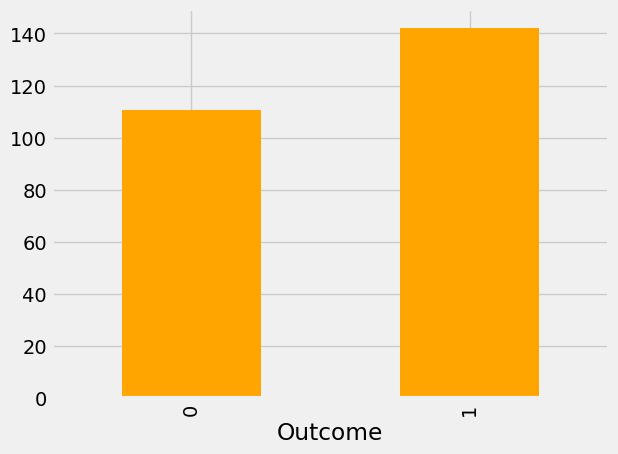

The Bivariate barchart between Outcome and BloodPressure


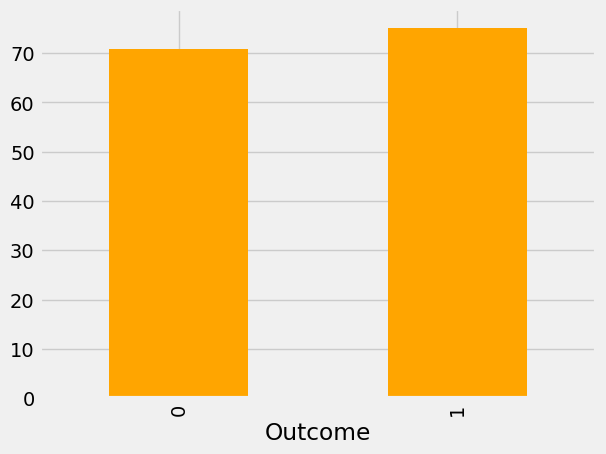

The Bivariate barchart between Outcome and SkinThickness


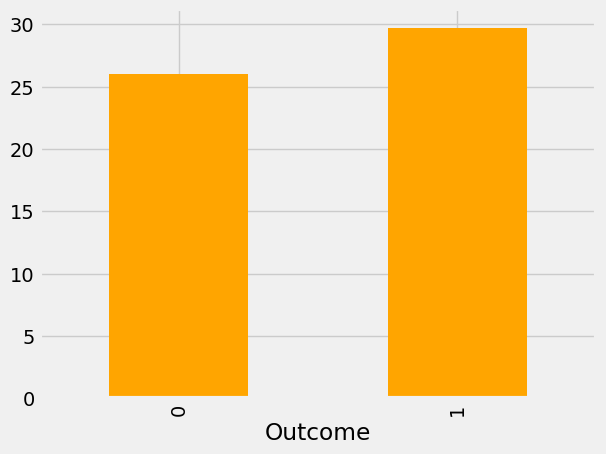

The Bivariate barchart between Outcome and Insulin


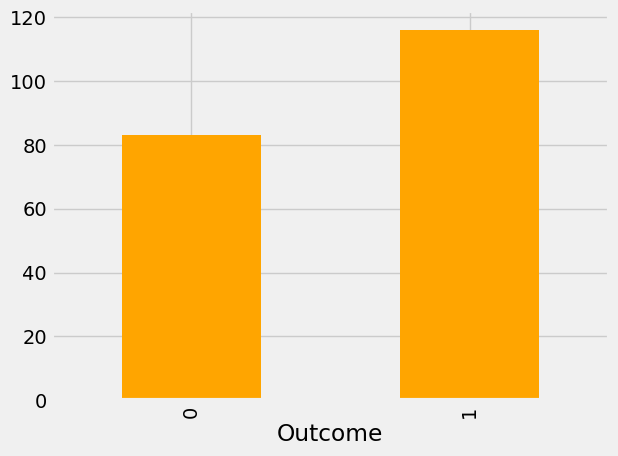

The Bivariate barchart between Outcome and BMI


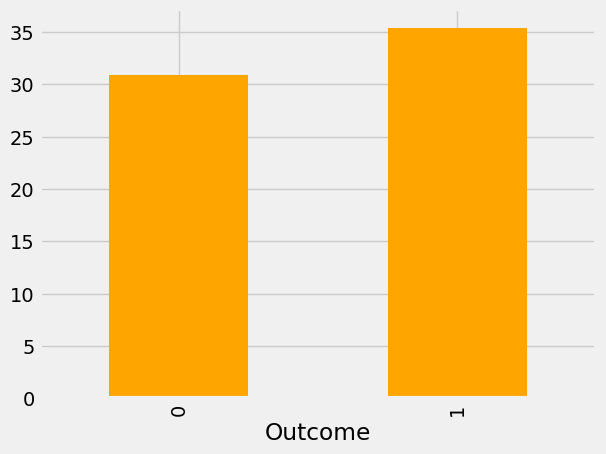

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


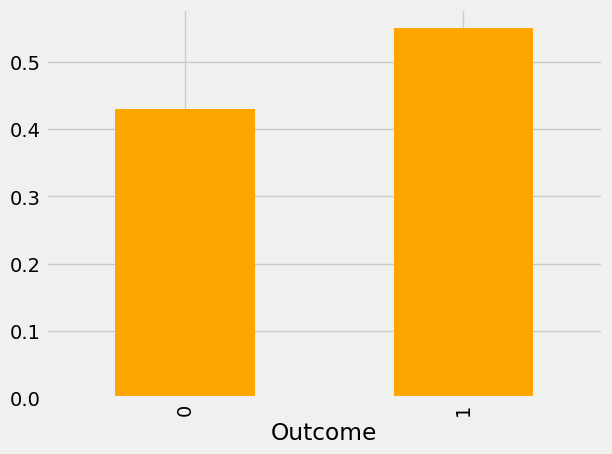

The Bivariate barchart between Outcome and Age


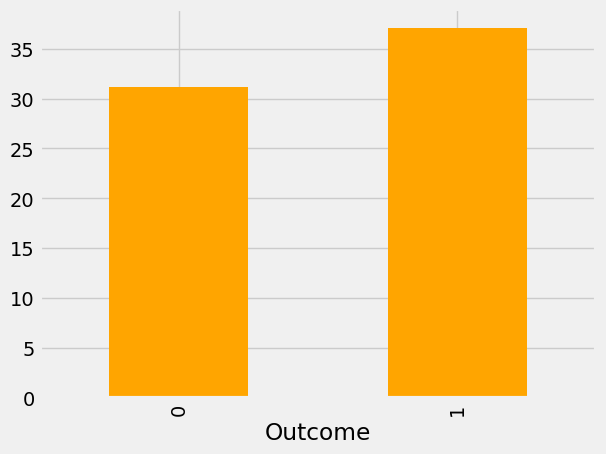

The Bivariate barchart between Outcome and Outcome


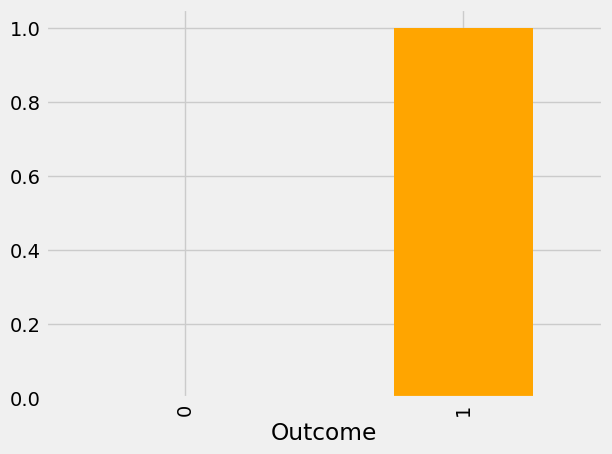

In [18]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [21]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


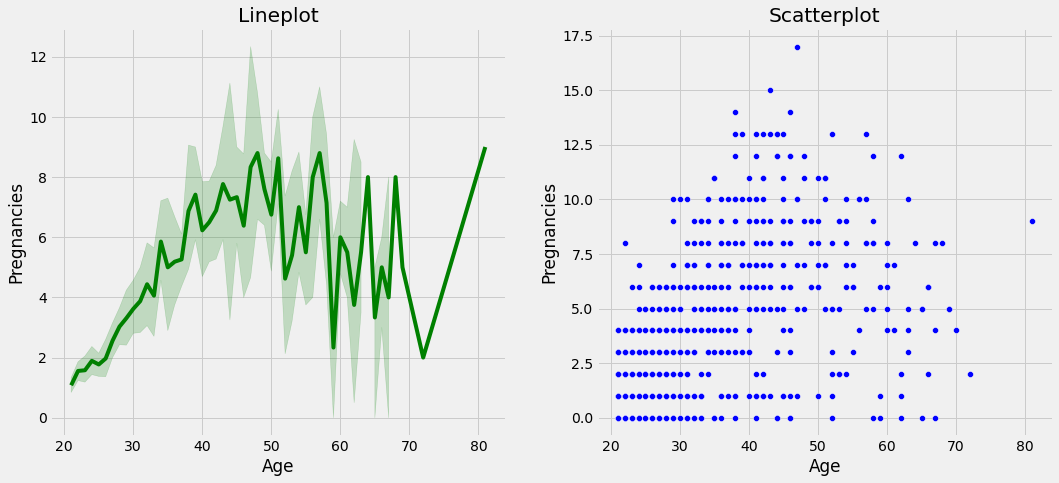

Bivariates between Age and Glucose


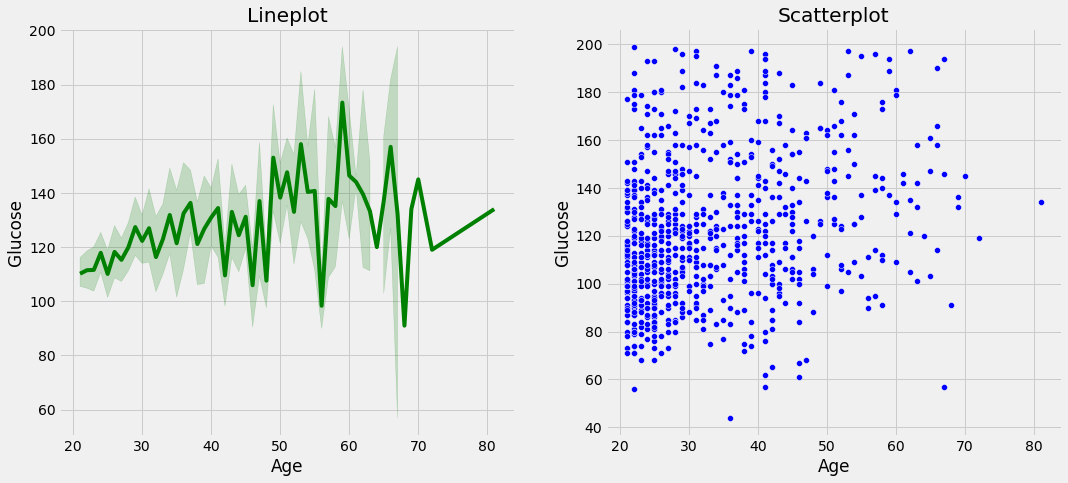

Bivariates between Age and BloodPressure


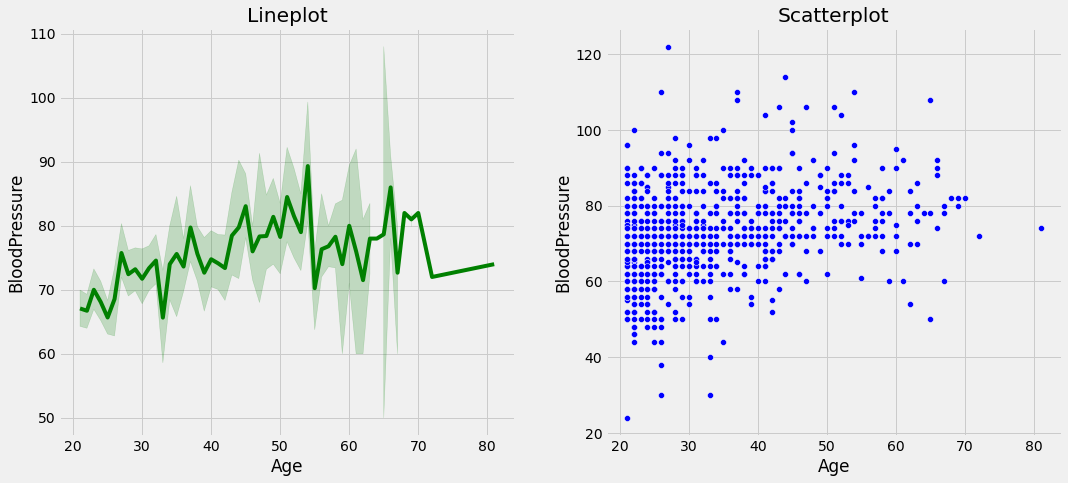

Bivariates between Age and SkinThickness


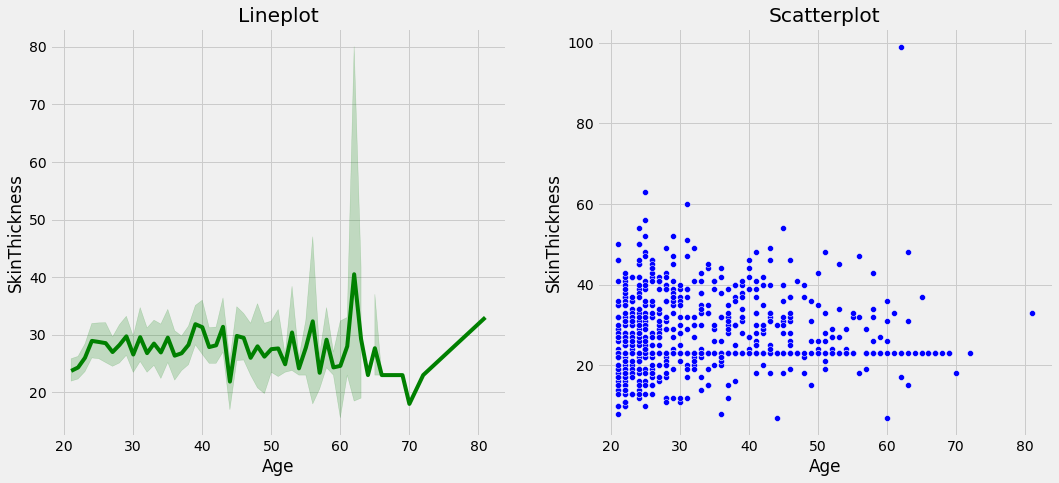

Bivariates between Age and Insulin


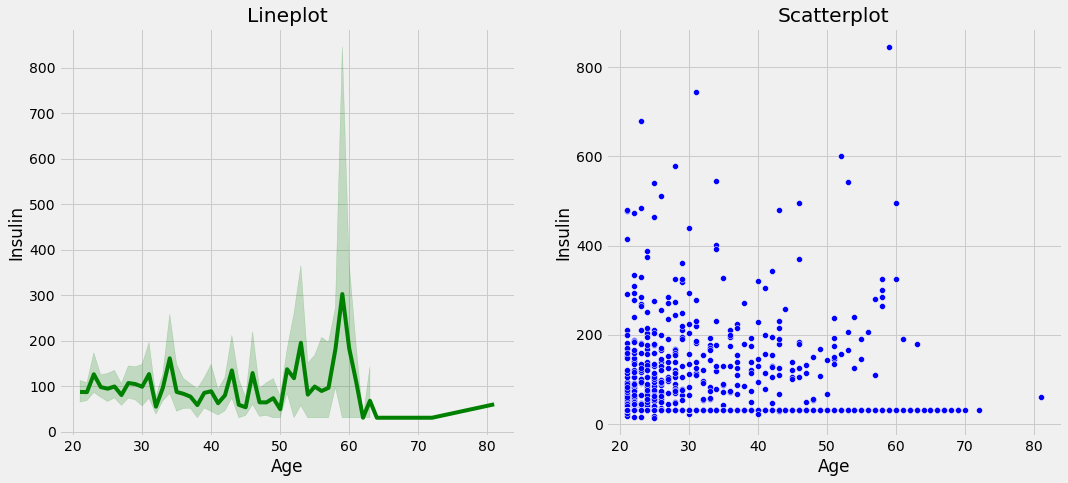

Bivariates between Age and BMI


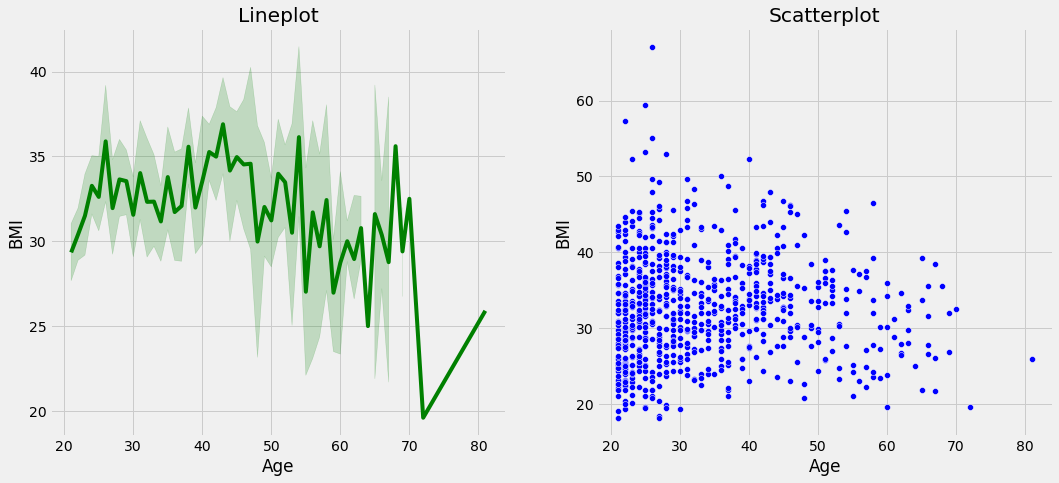

Bivariates between Age and DiabetesPedigreeFunction


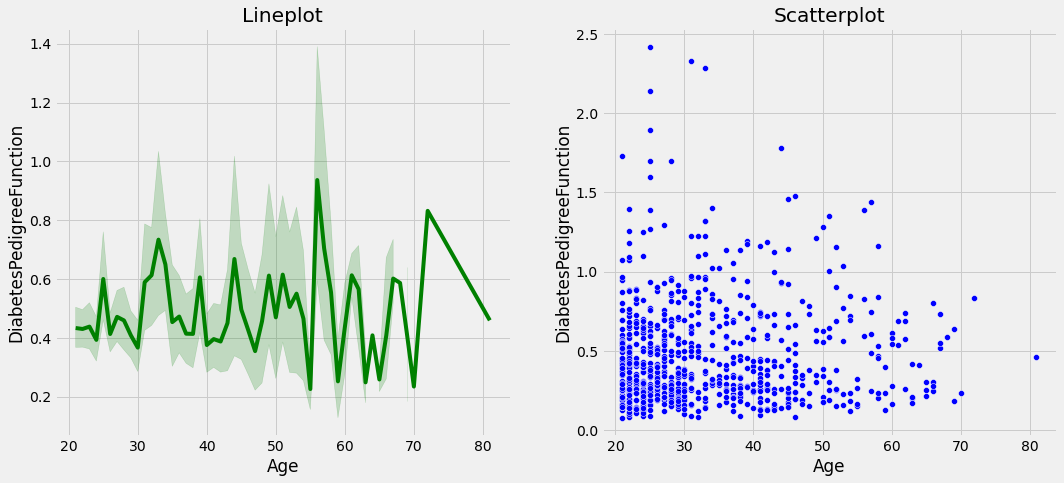

Bivariates between Age and Age


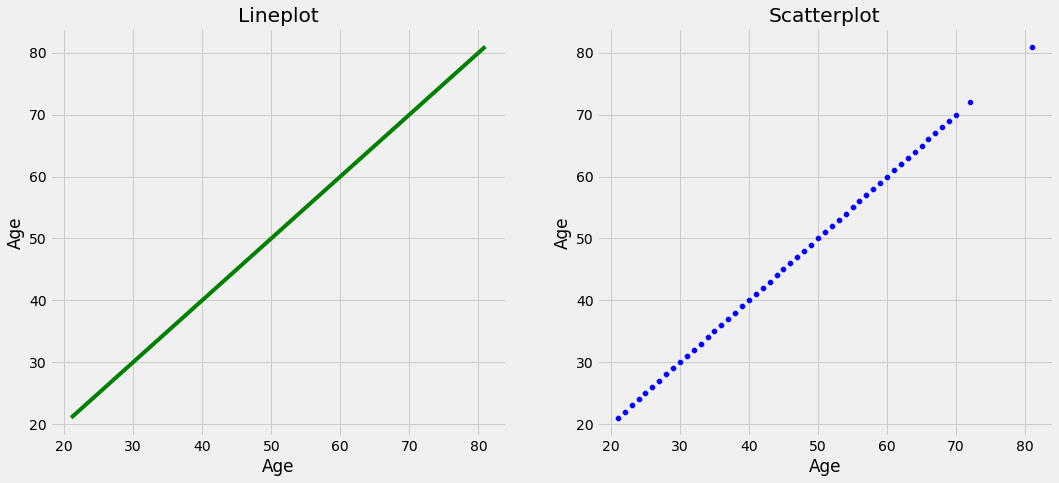

Bivariates between Age and Outcome


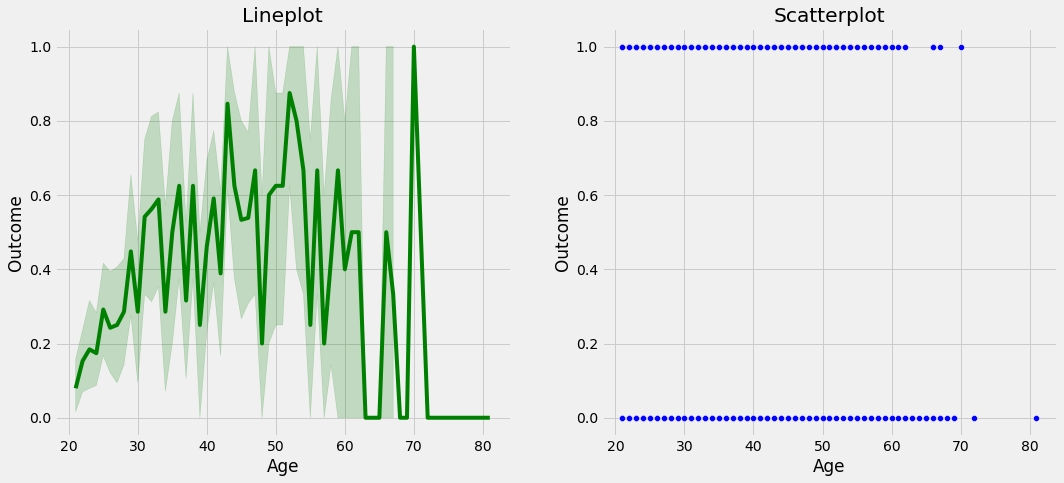

In [22]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

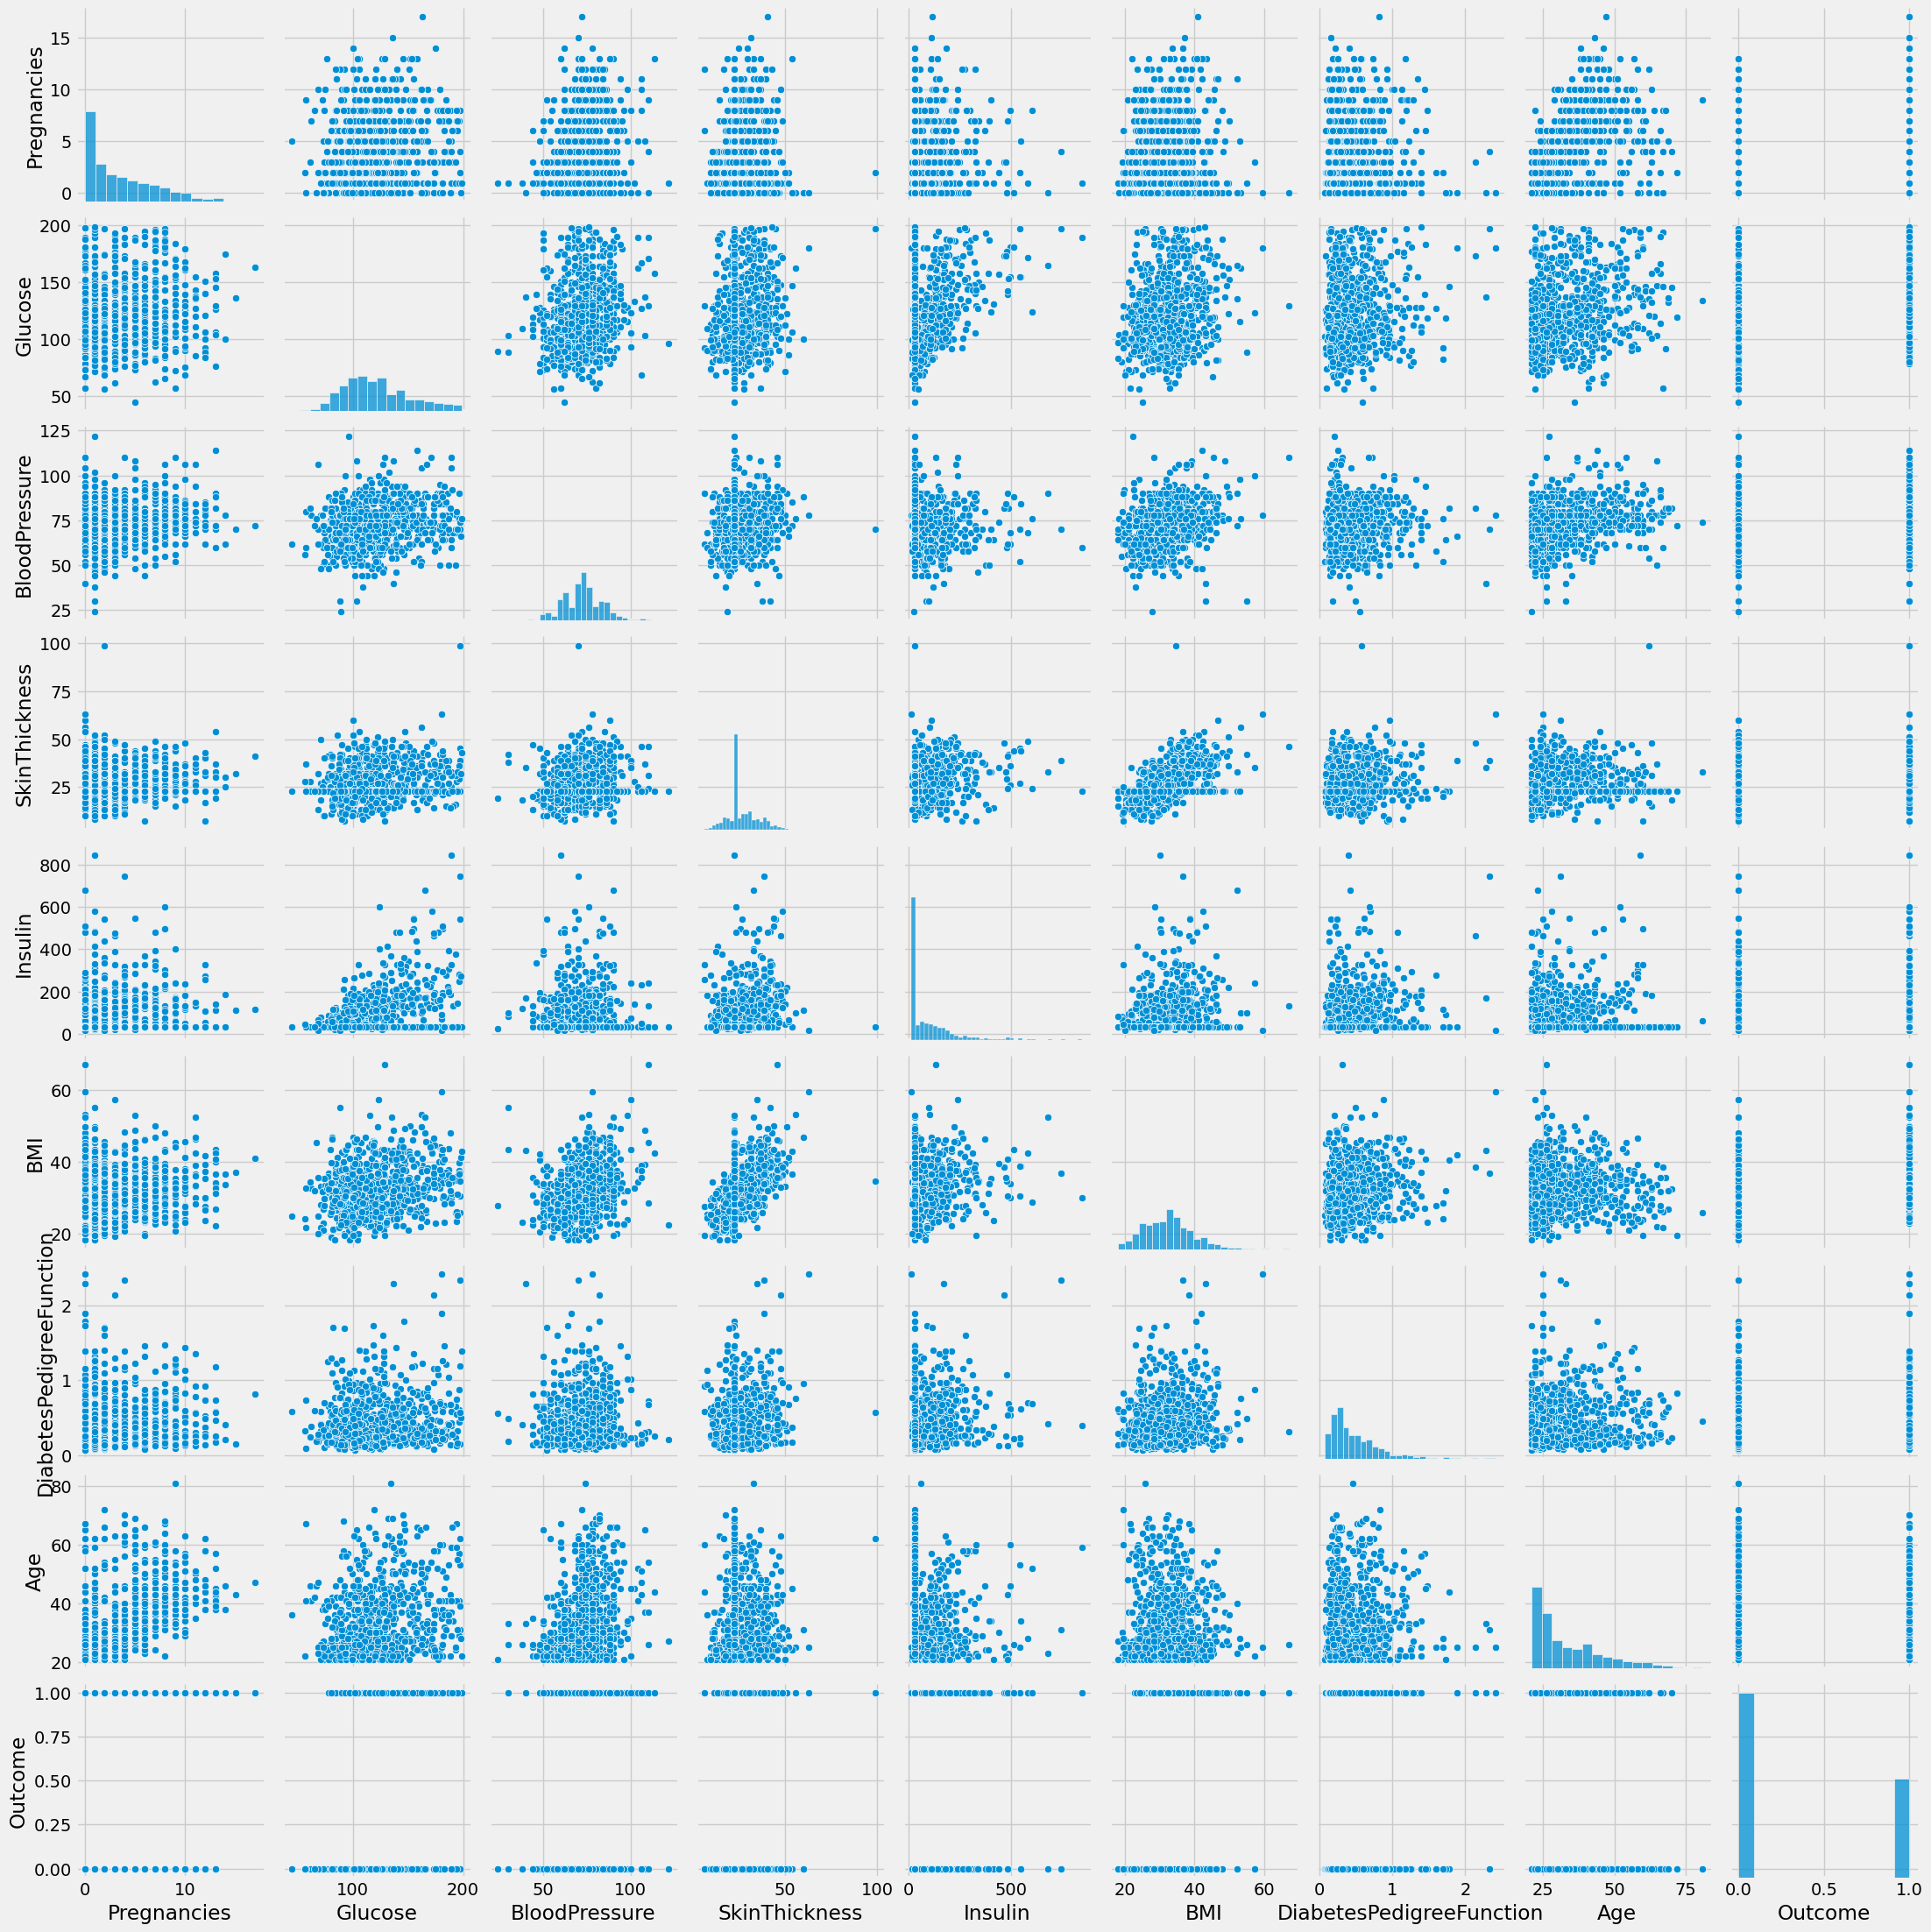

In [21]:
sns.pairplot(df)

**Observations**
There appears multicollinearity between Glucose and Insulin, BMI and skin thickness

In [23]:
# Lets look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

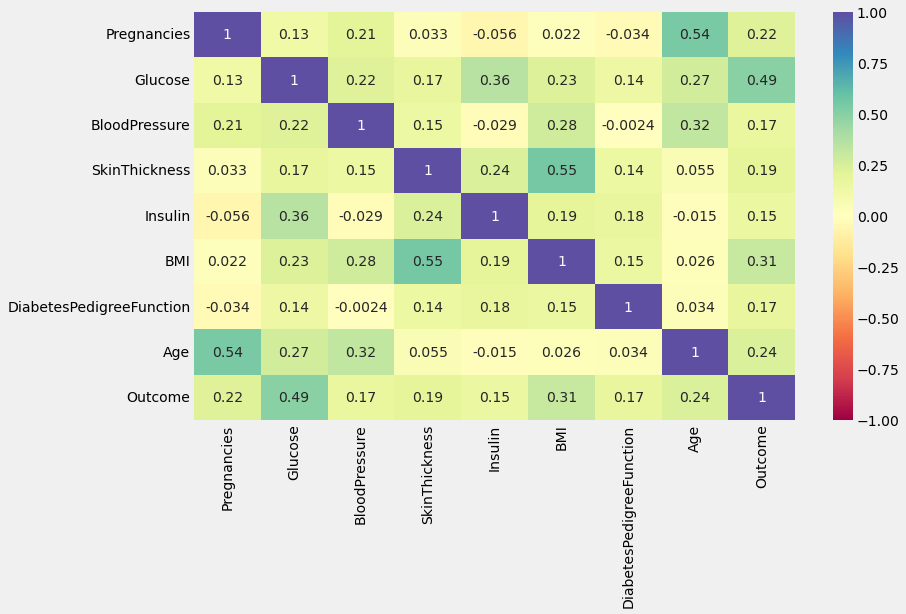

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**
Glucose and BMI are the strongest predictors of Outcome 

Lets create an app top display these charts 

In [24]:
#!pip install streamlit

In [25]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        
        
        

Writing eda.py


### Step5: Preprocessing
- sepaarate the features and label 
- impute nulls
- encode cats
- solve data imbalance
- train test split 
- standard scaling

In [26]:
#create a functiomn to do the preprocessing 
def preprocess(data,label):
    #sepaarte feature and labels
    x=df.drop(label,axis=1)
    y=df[label]
    #solve the data imbalance
    sm=SMOTE()
    x,y=sm.fit_resample(x,y)
    #train test split 
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)
    return x_train, x_test, y_train, y_test

In [27]:
x_train, x_test, y_train, y_test=preprocess(df,"Outcome")

In [28]:
#scale the features
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 8) (300, 8) (700,) (300,)


**Preprocessing is done** 

**The data is ready for modelling**

### Step 6: Fit and evaluate the model

In [30]:
def print_metrics(y_test,y_pred,model_name):
    print("Metrics for the model", model_name)
    print("")
    print("Accuracy Score-", accuracy_score(y_test,y_pred))
    print("")
    print("Precision Score-", precision_score(y_test,y_pred))
    print("")
    print("Recall Score-", recall_score(y_test,y_pred))
    print("")
    print("f1 Score-", f1_score(y_test,y_pred))
    print("")
    print("roc Score-", roc_auc_score(y_test,y_pred))
    print("")
    print("classification report", classification_report(y_test,y_pred))
        

In [41]:
def plot_metric(clf,x_test,y_test,model_name):
    print("Metrics for the model")
    plot_confusion_matrix(clf,x_test,y_test,display_labels=[0,1])
    print("")
    plot_roc_curve(clf,x_test,y_test)
    print("")
    plot_precision_recall_curve(clf,x_test,y_test)

In [32]:
#fit and evaluate the KNN Model

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

Metrics for the model KNN

Accuracy Score- 0.7633333333333333

Precision Score- 0.7222222222222222

Recall Score- 0.8609271523178808

f1 Score- 0.7854984894259818

roc Score- 0.7626783412596115

classification report               precision    recall  f1-score   support

           0       0.82      0.66      0.74       149
           1       0.72      0.86      0.79       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



Metrics for the model




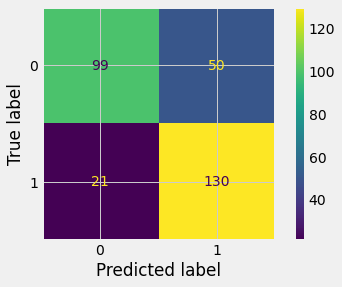

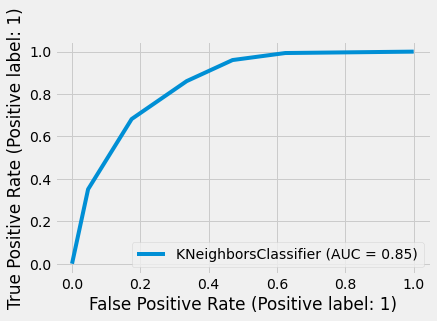

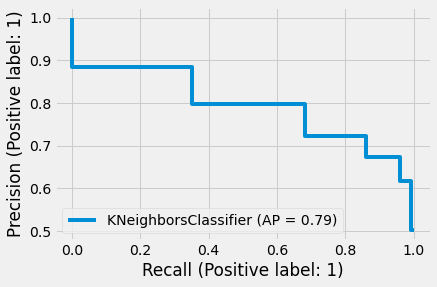

In [42]:
plot_metric(knn,x_test,y_test,"KNN")

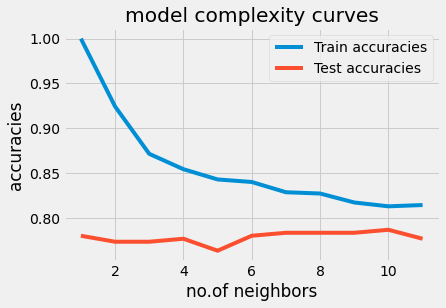

In [45]:
#lets tune the hyperparameter of knn 
neighbors=np.arange(1,12)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)
    
#plot the model complexity curves
plt.title("model complexity curves")
plt.plot(neighbors, train_accuracies, label="Train accuracies")
plt.plot(neighbors, test_accuracies, label="Test accuracies")
plt.legend()
plt.xlabel("no.of neighbors")
plt.ylabel("accuracies")
plt.show()
    

In [46]:
#refit KNN Model with k=8

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

Metrics for the model KNN

Accuracy Score- 0.7833333333333333

Precision Score- 0.7590361445783133

Recall Score- 0.8344370860927153

f1 Score- 0.7949526813880128

roc Score- 0.7829903551268945

classification report               precision    recall  f1-score   support

           0       0.81      0.73      0.77       149
           1       0.76      0.83      0.79       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



In [49]:
#lets fit all modeels at once and decide the one to optimized

clfs={
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}


models_report=pd.DataFrame(columns=["model","accuracy","recall","precision","f1"])

for clf, clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("fitting the model.... ",clf_name)
    t=pd.Series({
        "model":clf_name,
        "accuracy":accuracy_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "f1":f1_score(y_test,y_pred)
    })
    models_report=models_report.append(t,ignore_index=True)
    

models_report=models_report.sort_values(by="f1",ascending=False)
models_report

fitting the model....  Logreg
fitting the model....  KNN
fitting the model....  Naive Bayes
fitting the model....  Decision tree
fitting the model....  Random forest
fitting the model....  Adaboost
fitting the model....  Gradient Boosting
fitting the model....  XGBoost
fitting the model....  SVM


,model,accuracy,recall,precision,f1
4,Random forest,0.81,0.86755,0.779762,0.821317
8,SVM,0.796667,0.854305,0.767857,0.808777
6,Gradient Boosting,0.78,0.807947,0.767296,0.787097
1,KNN,0.763333,0.860927,0.722222,0.785498
7,XGBoost,0.766667,0.807947,0.748466,0.77707
5,Adaboost,0.746667,0.768212,0.738854,0.753247
3,Decision tree,0.723333,0.788079,0.7,0.741433
2,Naive Bayes,0.753333,0.695364,0.789474,0.739437
0,Logreg,0.723333,0.688742,0.742857,0.714777


In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print_metrics(y_test,y_pred,"RFC")

Metrics for the model RFC

Accuracy Score- 0.81

Precision Score- 0.7732558139534884

Recall Score- 0.8807947019867549

f1 Score- 0.823529411764706

roc Score- 0.8095248677719009

classification report               precision    recall  f1-score   support

           0       0.86      0.74      0.79       149
           1       0.77      0.88      0.82       151

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [52]:
#lets optimize random forest 
param_grid={
    "n_estimators":[100,150,200],
    "min_samples_leaf":range(1,5,1),
    "min_samples_split":range(2,10,2),
    "max_depth":[1,2,3,4,5],
    "max_features": ["sqrt","log2"],
    "criterion":["gini","entropy"]}

n_folds=3

cv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=n_folds,n_jobs=-1,return_train_score=False,verbose=3,scoring="f1")
cv.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [54]:
cv.best_score_   #accuracy, mention scoring=f1 if u wsnt f1

0.7985278114033479

In [56]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=150)

In [57]:
rfc_tuned=RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=150)
rfc_tuned.fit(x_train,y_train)
y_pred=rfc_tuned.predict(x_test)
print_metrics(y_test,y_pred,"RFC Tuned")

Metrics for the model RFC Tuned

Accuracy Score- 0.81

Precision Score- 0.7764705882352941

Recall Score- 0.8741721854304636

f1 Score- 0.8224299065420562

roc Score- 0.8095693141917417

classification report               precision    recall  f1-score   support

           0       0.85      0.74      0.80       149
           1       0.78      0.87      0.82       151

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [63]:
!pip install shap

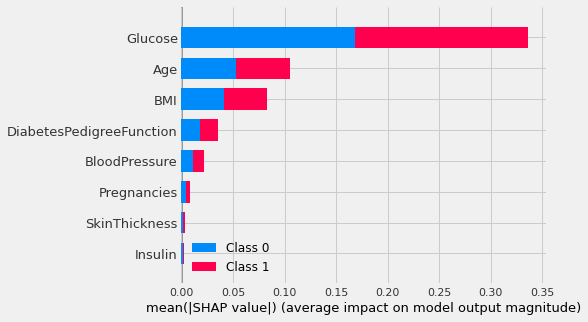

In [64]:
import shap
x= df.drop('Outcome', axis=1)
value= shap.TreeExplainer(rfc_tuned).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=x.columns)

## Create pipeline for deployment

In [58]:
from sklearn.pipeline import Pipeline

In [65]:
sc=StandardScaler()
rfc_tuned=rfc_tuned
x_train,x_test, y_train, y_test=preprocess(df,"Outcome")
steps=[("Scaling",sc),("Rfc tuned",rfc_tuned)]
pipeline=Pipeline(steps)
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test,y_pred,"Pipeline")

Metrics for the model Pipeline

Accuracy Score- 0.7566666666666667

Precision Score- 0.7267441860465116

Recall Score- 0.8278145695364238

f1 Score- 0.7739938080495355

roc Score- 0.7561891639628427

classification report               precision    recall  f1-score   support

           0       0.80      0.68      0.74       149
           1       0.73      0.83      0.77       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [66]:
#pickle the pipeline
import pickle
model=open("rfc.pickle","wb")
pickle.dump(pipeline,model)
model.close()

## Deployment of the pickled model

In [73]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title("Medical Diagnostic Web App ")


#step 1: load the model 
model=open("rfc.pickle","rb")    #read binary
clf=pickle.load(model)
model.close()


#step2 : get the frontend user input
pregs=st.number_input('Pregnancies',1,20,step=1)
glucose=st.slider('Glucose',40.0,200.0,40.0)
bp=st.slider('BloodPressure',24,122,24)
skin=st.slider('SkinThickness',7,99,7)
insulin=st.slider('Insulin',14,846,14)
bmi=st.slider('BMI',18.0,67.1,18.0)
dpf=st.slider('DiabetesPedigreeFunction',0.05,2.5,0.05)
age=st.slider('Age',21,81,21)


#step 3: converting user inout to model input 
data={'Pregnancies':pregs, 
      'Glucose':glucose,
      'BloodPressure':bp,
      'SkinThickness':skin, 
      'Insulin':insulin,
       'BMI':bmi, 
      'DiabetesPedigreeFunction':dpf, 
      'Age':age}
input_data=pd.DataFrame([data])

#step 4: get the prediction
preds=clf.predict(input_data)[0]
if st.button("Predict"):
    if preds==1:
        st.error("The person has Diabetes")
    if preds==0:
        st.success("The person is Diabetic Free")

Overwriting app.py


In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
df[df.columns[:]].agg(["min","max"])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,44,24,7,14.0,18.2,0.078,21,0
max,17,199,122,99,846.0,67.1,2.420,81,1
